In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# city_data.head()
# ride_data.head()

# Combine the data into a single dataset
Ride_City_Data = ride_data.merge(city_data, on="city")

# Display the data table for preview

# Ride_City_Data.shape

# Ride_City_Data.dtypes

Ride_City_Data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

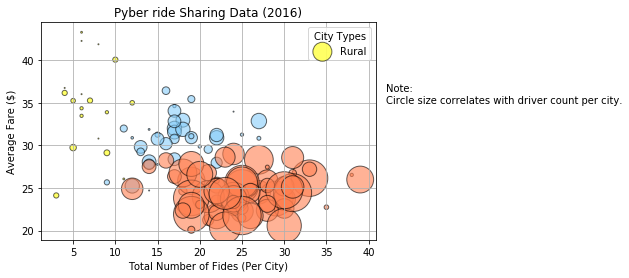

In [99]:
# Calculate and format Average fare by city
AvgFareByCity = pd.DataFrame(Ride_City_Data.groupby(['type', 'city'])['fare'].mean())
AvgFareByCity['fare'] = pd.to_numeric(AvgFareByCity['fare'])
# AvgFareByCity.head()

# Calculate Ride Cnt by city
RideCntByCity = pd.DataFrame(Ride_City_Data.groupby(['type', 'city'])['ride_id'].nunique())
# RideCntByCity.head()

# Calculate driver cnt by city
DriverCntByCity = pd.DataFrame(Ride_City_Data.groupby(['type', 'city'])['driver_count'].min())
# DriverCntByCity.head(100)

# Merge dataframes
SummaryByCity = AvgFareByCity.merge(RideCntByCity, on=(['type', 'city']))
SummaryByCity = SummaryByCity.merge(DriverCntByCity, on=(['type', 'city']))
SummaryByCity = SummaryByCity.reset_index()

# SummaryByCity.head()

# Set variables to used build scatter plot
colors = {'Urban':'coral', 'Suburban':'lightskyblue', 'Rural':'yellow'}
textstring = 'Note:\nCircle size correlates with driver count per city.'
x_axis = SummaryByCity["ride_id"]
y_axis = SummaryByCity["fare"]
group = SummaryByCity["type"].tolist()
sizes = SummaryByCity["driver_count"]
plotcolor = SummaryByCity["type"]

# Plot and build scatter plot
plt.scatter(x=x_axis,y=y_axis, c=plotcolor.apply(lambda x: colors[x]), marker="o", s=sizes**1.7, alpha=.6, linewidth=1, edgecolors="black")

# Add formatting to the scatter plot
plt.title("Pyber ride Sharing Data (2016)")
plt.legend(plotcolor, markerscale=0.7, scatterpoints=1, title='City Types')
plt.xlabel("Total Number of Fides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35, textstring, fontsize=10)
plt.grid(True)
plt.savefig("images/PyberRideSharing.png")
plt.show()

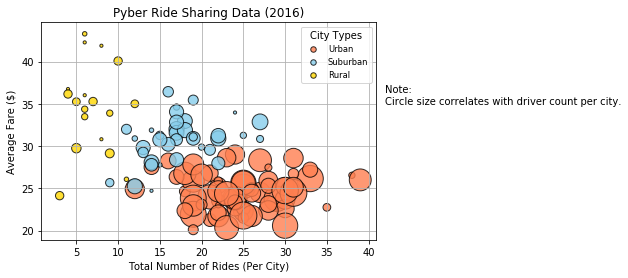

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

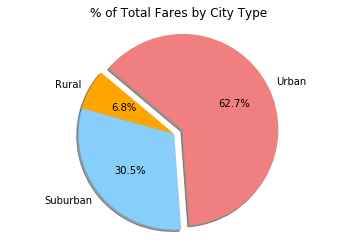

In [95]:
# Create dataframe for Fares by city, sort, and reset index
FaresByCity = pd.DataFrame(Ride_City_Data.groupby('type')['fare'].sum())
FaresByCity = FaresByCity.sort_values("fare", ascending=True)
FaresByCity = FaresByCitySort.reset_index()

# create and set variables for pie chart
Labels = FaresByCity["type"]
FareAmt = FaresByCity["fare"]
Colors = ["orange", "lightskyblue", "lightcoral"]
Explode = (0, 0, 0.1)

# plot pie chart
plt.title("% of Total Fares by City Type")
plt.pie(FareAmt, explode=Explode, labels=Labels, colors=Colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("images/TotalFaresByCityType.png")
plt.show()

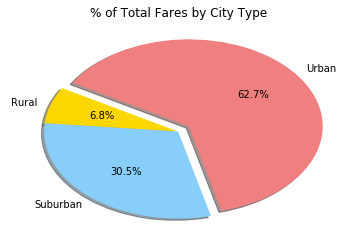

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

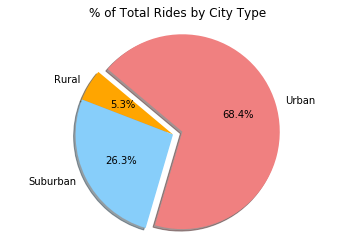

In [94]:
# Create dataframe for rides by city type, sort, and reset index
RideCntByCity = pd.DataFrame(Ride_City_Data.groupby('type')['ride_id'].count())
RideCntByCity = RideCntByCity.sort_values("ride_id", ascending=True)
RideCntByCity = RideCntByCity.reset_index()
# RideCntByCitySortReset

# create and set variables for pie chart
Labels = RideCntByCity["type"]
RideCnt = RideCntByCity["ride_id"]
Colors = ["orange", "lightskyblue", "lightcoral"]
Explode = (0, 0, 0.1)

# plot pie chart
plt.title("% of Total Rides by City Type")
plt.pie(RideCnt, explode=Explode, labels=Labels, colors=Colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("images/TotalRidesByCityType.png")
plt.show()

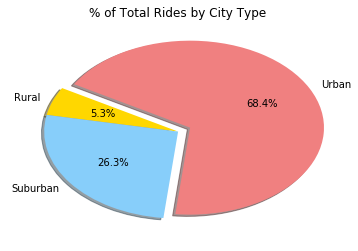

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

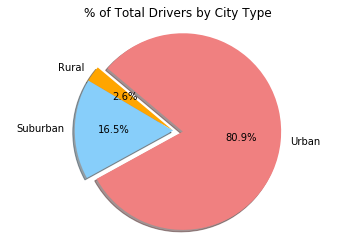

In [93]:
# Create dataframe for drivers by city type, sort, and reset and set index
DriverType = pd.DataFrame(Ride_City_Data.groupby(['type', 'city'])['driver_count'].min())
DriverType = DriverType.reset_index()
DriverType.set_index('type', inplace=True)
DriverType.head()

# Create new dataframe to create sum of driver cnt by city type and sort
DriversByCityType = pd.DataFrame(DriverType.groupby('type')['driver_count'].sum())
DriversByCityType = DriversByCityType.sort_values("driver_count", ascending=True)
DriversByCityType = DriversByCityType.reset_index()
# DriversByCityType

# Create and set variables for pie chart
Labels = DriversByCityType["type"]
DriverCnt = DriversByCityType["driver_count"]
Colors = ["orange", "lightskyblue", "lightcoral"]
Explode = (0, 0, 0.1)

# plot pie chart
plt.title("% of Total Drivers by City Type")
plt.pie(DriverCnt, explode=Explode, labels=Labels, colors=Colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("images/TotalDriversByCityType.png")
plt.show()

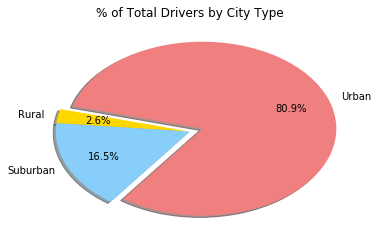

In [6]:
# Show Figure
plt.show()